# Khipus.ai
## Neural Network from Scratch
### Assignment 3: Diabetes prediction - Create a neural network with PyTorch
### Name: (add your name)
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>
---
This notebook implements a neural network using PyTorch to predict whether an individual is likely to develop diabetes. We will cover data loading, preprocessing, model definition, training, and evaluation.

### About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## 1. Importing Required Libraries
We start by importing the necessary libraries for data manipulation, visualization, and building our neural network.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


c:\Users\sanikj\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Loading the Dataset
We will load the diabetes_prediction_dataset.csv file and display the first few rows to understand its structure.

In [2]:
# Load the dataset
#Your code here
df = pd.read_csv('diabetes_prediction_dataset.csv')
# Display the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 3. Data Preprocessing

In [3]:
# Encode categorical features and handle missing values
# Leave this code as is
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}).fillna(0)
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3}).fillna(0)

We will separate the features and labels, split the dataset into training and testing sets, and scale the features.

In [4]:
# Separate features and labels
#Your code here
X = df.drop('diabetes', axis=1).values  # Features - Remove the 'diabetes' column from the dataframe and convert remaining columns into a numpy array containing all feature data.
y = df['diabetes'].values  # Labels - Extract the 'diabetes' column from the dataframe as a numpy array containing the target values.

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# train_test_split: Partition the feature array (X) and label array (y) into training and test sets.
# test_size=0.2 means 20% of the data will be used for testing, while 80% is reserved for training.
# random_state=42 ensures reproducibility of the split.

# Scale the features
scaler = StandardScaler()  # Initialize the StandardScaler object to standardize features by removing the mean and scaling to unit variance.
X_train = scaler.fit_transform(X_train)  
# Fit the scaler on the training feature data (compute mean and standard deviation) and transform the training data accordingly.
X_test = scaler.transform(X_test)  
# Apply the transformation to the test data using the statistics computed from the training data, ensuring consistency.

## 4. Defining the Neural Network Architecture
We will define a simple feedforward neural network with one hidden layer.

In [5]:
# Define the neural network class that inherits from torch.nn.Module
#Your code here
class diabetesNN(nn.Module):
    def __init__(self, input_size):  # Constructor method that initializes the NN layers; input_size specifies the number of features
        super(diabetesNN, self).__init__()  # Call the parent class constructor to properly set up the module
        self.fc1 = nn.Linear(input_size, 16)  # First layer with 16 neurons; performs a linear transformation from input dimension to a hidden layer of 16 nodes
        self.fc2 = nn.Linear(16, 1)  # output layer with 1 neuron; transforms the hidden layer output into a single prediction value
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification; squashes the output between 0 and 1

    def forward(self, x):  # Forward method defines how the input data flows through the network to produce an output
        x = torch.relu(self.fc1(x))  # Pass input through first layer (fc1) and apply ReLU activation for non-linearity; Original comment: # Apply ReLU activation
        x = self.sigmoid(self.fc2(x))  # Pass the activated output through second layer (fc2) and then apply sigmoid activation; Original comment: # Apply sigmoid activation
        return x  # Return the final output which is probability score for binary classification

## 5. Training the Neural Network
We will train the neural network using binary cross-entropy loss and the Adam optimizer.

In [6]:
# Convert data to PyTorch tensors
#Your code here
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Initialize the model, loss function, and optimizer
model = diabetesNN(input_size=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.7240
Epoch [20/100], Loss: 0.6947
Epoch [30/100], Loss: 0.6671
Epoch [40/100], Loss: 0.6410
Epoch [50/100], Loss: 0.6161
Epoch [60/100], Loss: 0.5920
Epoch [70/100], Loss: 0.5684
Epoch [80/100], Loss: 0.5451
Epoch [90/100], Loss: 0.5221
Epoch [100/100], Loss: 0.4993


## 6. Evaluating the Model
After training, we will evaluate the model's performance on the test set.

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     18292
         1.0       0.46      0.12      0.19      1708

    accuracy                           0.91     20000
   macro avg       0.69      0.55      0.57     20000
weighted avg       0.88      0.91      0.89     20000



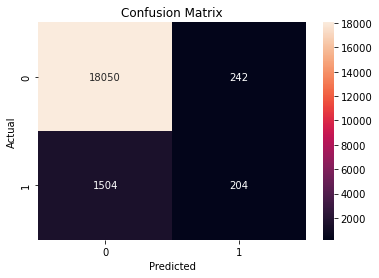

In [7]:
# Set the model to evaluation mode 
# this ensures that layers like dropout and batch normalization behave accordingly during inference. 
# YOUR CODE HERE
model.eval()
with torch.no_grad():  # Disable gradient calculation to improve efficiency and reduce memory usage during inference, since gradients are not needed. 
    test_outputs = model(X_test_tensor)  # Forward pass on test data: pass the standardized test tensor through the model to obtain predicted probabilities. 
    predicted = (test_outputs > 0.5).float()  # Convert probabilities to binary predictions using a threshold of 0.5, then cast the boolean results to float type. 

# Print classification report
print(classification_report(y_test_tensor, predicted))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Calculate model accuracy
# Compare the predicted labels with the true test labels for each sample,
# resulting in a tensor of boolean values (True for correct predictions, False for incorrect ones).
# Then, sum these boolean values (with True counted as 1) to obtain the total number of correct predictions.
# Finally, convert the resulting tensor to a Python number using .item().
# YOUR CODE HERE
correct = (predicted == y_test_tensor).sum().item()

# Retrieve the total number of test samples by getting the size of the first dimension of the tensor.
total = y_test_tensor.size(0)

# Calculate the accuracy by dividing the total number of correct predictions by the total number of samples.
accuracy = correct / total

# Output the computed test accuracy to the console.
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9127
